In [21]:
import pandas as pd

df = pd.read_csv("credit_card_fraud.csv")

# Show all columns, but only the first 5 rows
print(df.head())

  trans_date_trans_time                   merchant       category     amt  \
0   2019-01-01 00:00:44  Heller, Gutmann and Zieme    grocery_pos  107.23   
1   2019-01-01 00:00:51             Lind-Buckridge  entertainment  220.11   
2   2019-01-01 00:07:27                  Kiehn Inc    grocery_pos   96.29   
3   2019-01-01 00:09:03                Beier-Hyatt   shopping_pos    7.77   
4   2019-01-01 00:21:32                 Bruen-Yost       misc_pos    6.85   

                       city state      lat      long  city_pop  \
0                    Orient    WA  48.8878 -118.2105       149   
1                Malad City    ID  42.1808 -112.2620      4154   
2                   Grenada    CA  41.6125 -122.5258       589   
3  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
4                   Freedom    WY  43.0172 -111.0292       471   

                                 job         dob  \
0  Special educational needs teacher  1978-06-21   
1        Nature conservation officer

In [22]:
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [23]:
# Drop the unnecessary columns
df.drop(columns=['merchant', 'city', 'state', 'job', 'trans_num'], inplace=True)
# Confirm the remaining columns
print(df.columns)

Index(['trans_date_trans_time', 'category', 'amt', 'lat', 'long', 'city_pop',
       'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [24]:
# Show the first 5 rows after dropping the columns
print(df.head())

  trans_date_trans_time       category     amt      lat      long  city_pop  \
0   2019-01-01 00:00:44    grocery_pos  107.23  48.8878 -118.2105       149   
1   2019-01-01 00:00:51  entertainment  220.11  42.1808 -112.2620      4154   
2   2019-01-01 00:07:27    grocery_pos   96.29  41.6125 -122.5258       589   
3   2019-01-01 00:09:03   shopping_pos    7.77  32.9396 -105.8189       899   
4   2019-01-01 00:21:32       misc_pos    6.85  43.0172 -111.0292       471   

          dob  merch_lat  merch_long  is_fraud  
0  1978-06-21  49.159047 -118.186462         0  
1  1962-01-19  43.150704 -112.154481         0  
2  1945-12-21  41.657520 -122.230347         0  
3  1967-08-30  32.863258 -106.520205         0  
4  1967-08-02  43.753735 -111.454923         0  


In [25]:
# List of remaining columns
remaining_cols = ['trans_date_trans_time', 'category', 'amt', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud']

missing_values = df[remaining_cols].isnull().sum()

if missing_values.sum() == 0:
    print("No null values found in the dataset.")
else:
    print(missing_values[missing_values > 0])


No null values found in the dataset.


In [26]:
# Convert datetime columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Convert binary target to int (if not already)
df['is_fraud'] = df['is_fraud'].astype(int)

# Display the results
print("\nData types after conversion:")
print(df[['trans_date_trans_time', 'dob', 'is_fraud']].dtypes)

print("\nSample data after conversion:")
print(df[['trans_date_trans_time', 'dob', 'is_fraud']].head())


Data types after conversion:
trans_date_trans_time    datetime64[ns]
dob                      datetime64[ns]
is_fraud                          int32
dtype: object

Sample data after conversion:
  trans_date_trans_time        dob  is_fraud
0   2019-01-01 00:00:44 1978-06-21         0
1   2019-01-01 00:00:51 1962-01-19         0
2   2019-01-01 00:07:27 1945-12-21         0
3   2019-01-01 00:09:03 1967-08-30         0
4   2019-01-01 00:21:32 1967-08-02         0


In [27]:
# ---- FEATURE ENGINEERING ----

# 1. Age of the customer
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# 2. Transaction Hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# 3. Day of the Week (0=Monday, 6=Sunday)
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek

# 4. Is Weekend
df['is_weekend'] = df['trans_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# 5. Transaction Month
df['trans_month'] = df['trans_date_trans_time'].dt.month

# 6. Is Night Transaction (0 AM to 6 AM)
df['is_night'] = df['trans_hour'].apply(lambda x: 1 if (0 <= x <= 6) else 0)

# 7. Amount per Age Ratio
df['amount_per_age'] = df['amt'] / (df['age'] + 1)  # +1 to avoid divide by zero

# 8. Category Fraud Rate Mapping (if 'category' column exists)
if 'category' in df.columns:
    category_fraud_rate = df.groupby('category')['is_fraud'].mean()
    df['category_fraud_rate'] = df['category'].map(category_fraud_rate)

# ---- OPTIONAL CLEANUP ----

# Drop original datetime columns (no longer needed after feature engineering)
df = df.drop(['trans_date_trans_time', 'dob'], axis=1)

# Preview the new dataframe
print("\n✅ Feature Engineering Complete. Sample Data:")
print(df.head())



✅ Feature Engineering Complete. Sample Data:
        category     amt      lat      long  city_pop  merch_lat  merch_long  \
0    grocery_pos  107.23  48.8878 -118.2105       149  49.159047 -118.186462   
1  entertainment  220.11  42.1808 -112.2620      4154  43.150704 -112.154481   
2    grocery_pos   96.29  41.6125 -122.5258       589  41.657520 -122.230347   
3   shopping_pos    7.77  32.9396 -105.8189       899  32.863258 -106.520205   
4       misc_pos    6.85  43.0172 -111.0292       471  43.753735 -111.454923   

   is_fraud  age  trans_hour  trans_dayofweek  is_weekend  trans_month  \
0         0   41           0                1           0            1   
1         0   57           0                1           0            1   
2         0   74           0                1           0            1   
3         0   52           0                1           0            1   
4         0   52           0                1           0            1   

   is_night  amount_per_age 

Text(0.5, 1.0, 'Fraud vs Non-Fraud Transaction Counts')

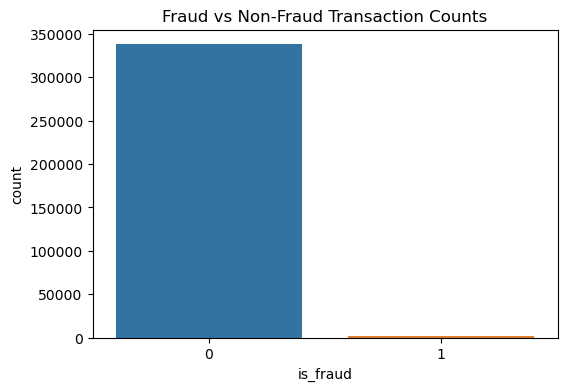

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of fraud vs non-fraud
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Counts')

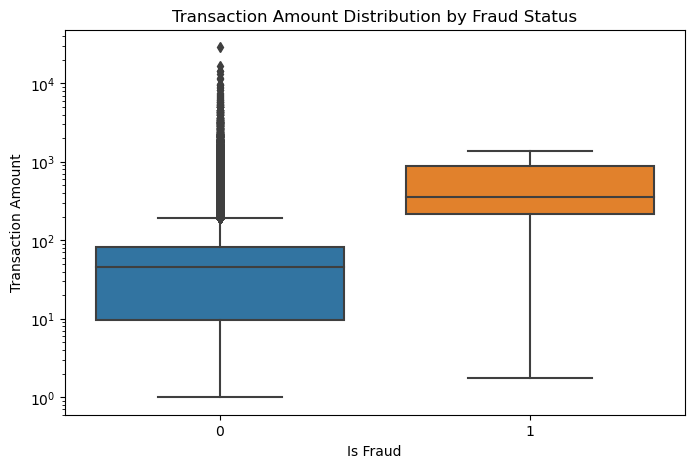

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale to handle outliers
plt.show()

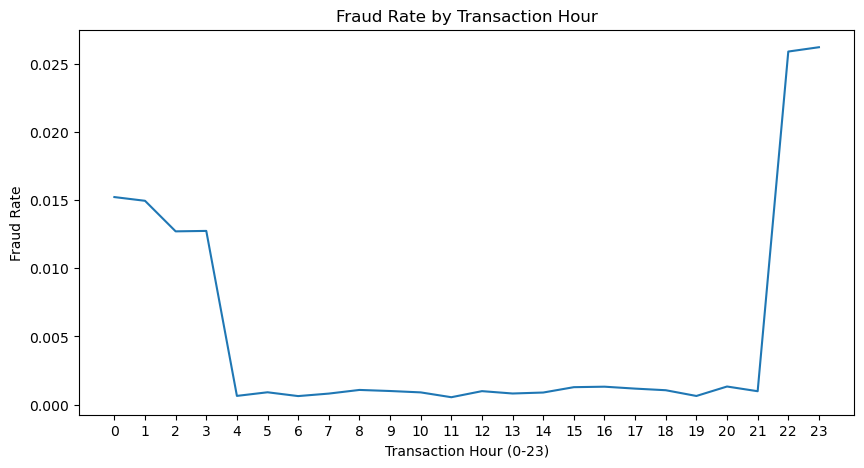

In [30]:
hour_fraud_rate = df.groupby('trans_hour')['is_fraud'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='trans_hour', y='is_fraud', data=hour_fraud_rate)
plt.title('Fraud Rate by Transaction Hour')
plt.xlabel('Transaction Hour (0-23)')
plt.ylabel('Fraud Rate')
plt.xticks(range(0,24))
plt.show()

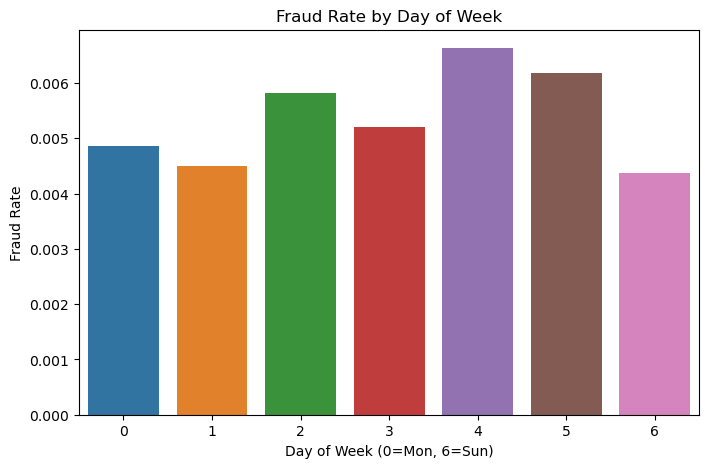

In [31]:
day_fraud_rate = df.groupby('trans_dayofweek')['is_fraud'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='trans_dayofweek', y='is_fraud', data=day_fraud_rate)
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Fraud Rate')
plt.show()

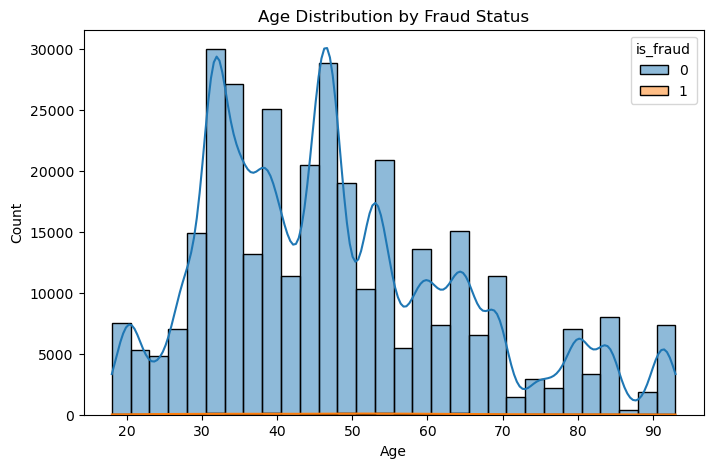

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='is_fraud', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

# List numeric columns to scale (adjust if needed)
numeric_cols = ['amt', 'age', 'trans_hour', 'trans_dayofweek', 'city_pop', 'merch_lat', 'merch_long', 'amount_per_age']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n✅ Numeric features scaled.")
print(df[numeric_cols].head())




✅ Numeric features scaled.
        amt       age  trans_hour  trans_dayofweek  city_pop  merch_lat  \
0  0.226702 -0.398227    -1.88115        -0.893542 -0.365123   1.839876   
1  0.924893  0.543395    -1.88115        -0.893542 -0.351456   0.668861   
2  0.159035  1.543869    -1.88115        -0.893542 -0.363622   0.377842   
3 -0.388483  0.249138    -1.88115        -0.893542 -0.362564  -1.336143   
4 -0.394173  0.249138    -1.88115        -0.893542 -0.364024   0.786391   

   merch_long  amount_per_age  
0   -0.597291        0.233223  
1   -0.120981        0.548625  
2   -0.916613       -0.089118  
3    0.323925       -0.377944  
4   -0.065741       -0.382353  


In [34]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n✅ Data split: {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples.")


✅ Data split: 271685 training samples and 67922 testing samples.


In [35]:
import sys
print(sys.executable)

c:\Users\Admin\anaconda3\python.exe


In [36]:
from xgboost import XGBClassifier

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numeric columns
categorical_cols = ['category']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocess: OneHotEncode categorical feature(s)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Combine preprocessing and model into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Define hyperparameter space (note the double underscore for pipeline)
rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=rf_params,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit the search on training data
rf_random_search.fit(X_train, y_train)

# Best model
best_rf = rf_random_search.best_estimator_

print("✅ Best Parameters:", rf_random_search.best_params_)
print("✅ Best AUC:", rf_random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20}
✅ Best AUC: 0.9945609781648129


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Identify columns
categorical_cols = ['category']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Define model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Combine into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

# Parameter grid (notice the double underscore)
xgb_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]
}

# Randomized search
xgb_random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=xgb_params,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit
xgb_random_search.fit(X_train, y_train)

# Best model
best_xgb = xgb_random_search.best_estimator_

print("✅ Best Parameters:", xgb_random_search.best_params_)
print("✅ Best AUC:", xgb_random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Parameters: {'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 0.8}
✅ Best AUC: 0.9969003981366257


In [41]:
def evaluate_model(model_name, y_true, y_pred, y_prob):
    print(f"\n📊 Evaluating {model_name} ...")
    print("-" * 60)
    # Placeholder — you can add metrics or plots later
    return {
        "model": model_name,
        "y_true": y_true,
        "y_pred": y_pred,
        "y_prob": y_prob
    }


# Predict and evaluate tuned RF
y_pred_rf_tuned = best_rf.predict(X_test)
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:, 1]
evaluate_model("Tuned Random Forest", y_test, y_pred_rf_tuned, y_prob_rf_tuned)

# Predict and evaluate tuned XGB
y_pred_xgb_tuned = best_xgb.predict(X_test)
y_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:, 1]
evaluate_model("Tuned XGBoost", y_test, y_pred_xgb_tuned, y_prob_xgb_tuned)


📊 Evaluating Tuned Random Forest ...
------------------------------------------------------------

📊 Evaluating Tuned XGBoost ...
------------------------------------------------------------


{'model': 'Tuned XGBoost',
 'y_true': 50883     0
 148234    0
 190126    0
 188267    0
 159797    0
          ..
 332738    0
 154568    0
 165663    0
 228283    0
 275933    0
 Name: is_fraud, Length: 67922, dtype: int32,
 'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
 'y_prob': array([5.8179809e-05, 5.4622971e-05, 5.8807188e-04, ..., 1.0596036e-05,
        4.2602631e-05, 5.8094604e-04], dtype=float32)}

In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = ohe.fit_transform(X_train[['category']])
X_test_encoded = ohe.transform(X_test[['category']])

# Replace encoded column(s)
X_train = X_train.drop('category', axis=1)
X_test = X_test.drop('category', axis=1)

import pandas as pd
encoded_cols = ohe.get_feature_names_out(['category'])
X_train = pd.concat([X_train.reset_index(drop=True),
                     pd.DataFrame(X_train_encoded, columns=encoded_cols)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True),
                    pd.DataFrame(X_test_encoded, columns=encoded_cols)], axis=1)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest Tuning
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, rf_params, cv=3, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)
tuned_rf = grid_rf.best_estimator_

# XGBoost Tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_params = {
    'n_estimators': [100],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3]
}
grid_xgb = GridSearchCV(xgb, xgb_params, cv=3, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
tuned_xgb = grid_xgb.best_estimator_

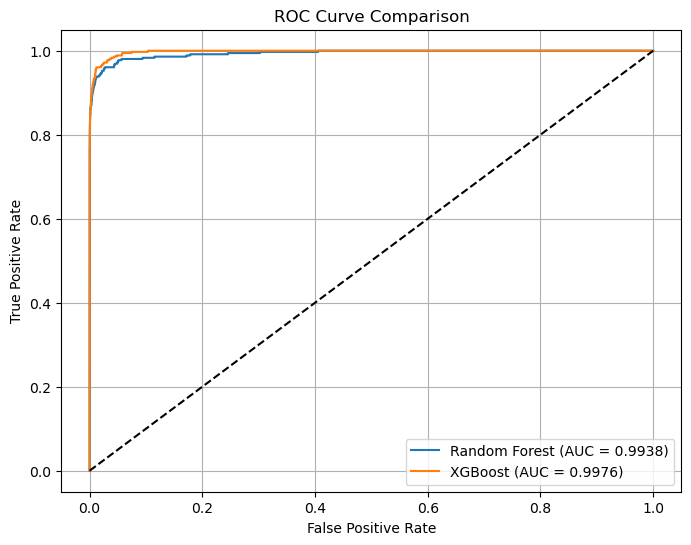

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, tuned_rf.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, tuned_xgb.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, tuned_rf.predict_proba(X_test)[:, 1]):.4f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_score(y_test, tuned_xgb.predict_proba(X_test)[:, 1]):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Metrics
y_pred_rf = tuned_rf.predict(X_test)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, tuned_rf.predict_proba(X_test)[:, 1]):.4f}")
print()

# XGBoost Metrics
y_pred_xgb = tuned_xgb.predict(X_test)
print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, tuned_xgb.predict_proba(X_test)[:, 1]):.4f}")

Random Forest:
Accuracy: 0.9983
Precision: 0.9765
Recall: 0.6994
F1 Score: 0.8151
ROC AUC: 0.9938

XGBoost:
Accuracy: 0.9983
Precision: 0.9517
Recall: 0.7191
F1 Score: 0.8192
ROC AUC: 0.9976


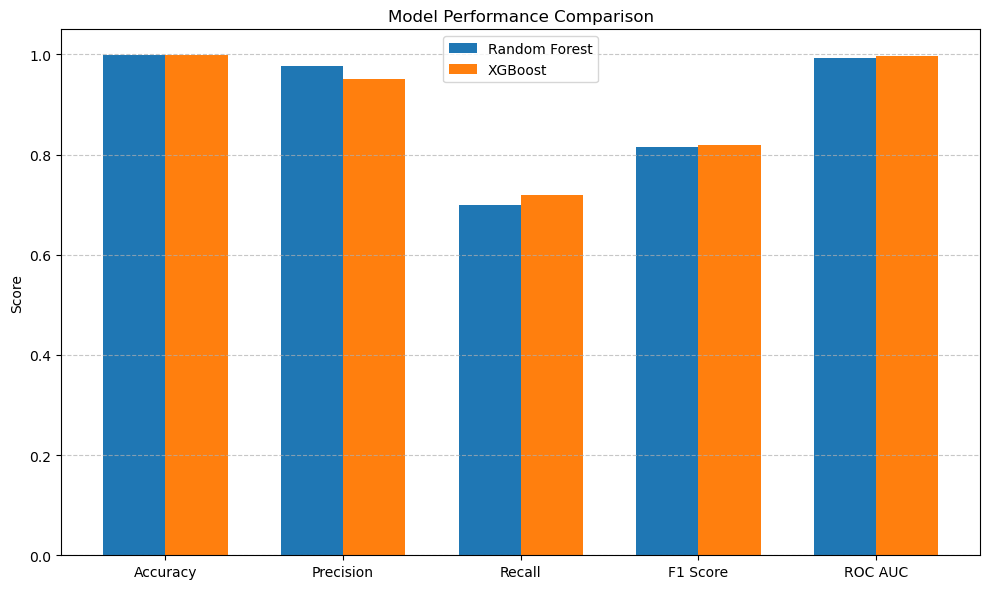

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Store metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf),
    roc_auc_score(y_test, tuned_rf.predict_proba(X_test)[:, 1])
]

xgb_scores = [
    accuracy_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb),
    recall_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_xgb),
    roc_auc_score(y_test, tuned_xgb.predict_proba(X_test)[:, 1])
]

# Bar chart
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_scores, width, label='Random Forest')
plt.bar(x + width/2, xgb_scores, width, label='XGBoost')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

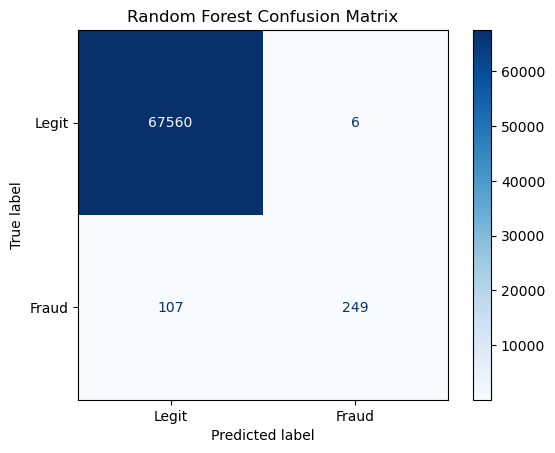

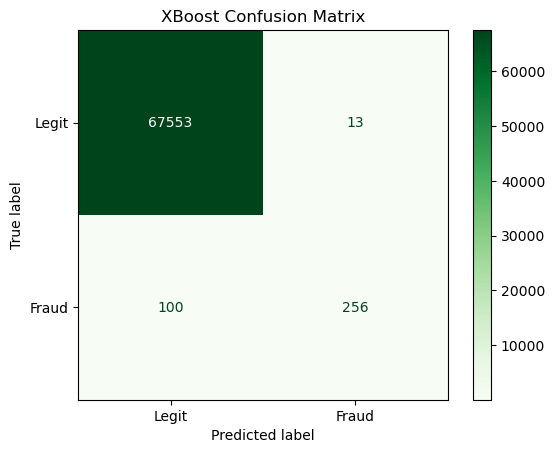

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Legit', 'Fraud'])
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Legit', 'Fraud'])
disp_xgb.plot(cmap='Greens')
plt.title("XBoost Confusion Matrix")
plt.show()

In [49]:
from sklearn.metrics import classification_report

# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Legit", "Fraud"]))

# XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["Legit", "Fraud"]))


Random Forest Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     67566
       Fraud       0.98      0.70      0.82       356

    accuracy                           1.00     67922
   macro avg       0.99      0.85      0.91     67922
weighted avg       1.00      1.00      1.00     67922

XGBoost Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     67566
       Fraud       0.95      0.72      0.82       356

    accuracy                           1.00     67922
   macro avg       0.98      0.86      0.91     67922
weighted avg       1.00      1.00      1.00     67922

